In [1]:
# Librerias
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Datos
data = pd.read_csv(r'C:\Users\User\Desktop\Prueba_Tecnica_ESRI\base_prueba_tecnica.csv', index_col=0,sep=';', encoding='latin-1')
print('Cantidad datos', data.shape)
print('Variables y tipo de dato:\n', data.dtypes)

Cantidad datos (3000, 8)
Variables y tipo de dato:
 Edad                         int64
Genero                      object
Ingresos Anuales             int64
Gasto Mensual                int64
Puntuación de Crédito        int64
Región                      object
Comportamiento en linea      int64
Compras en el ultimo año     int64
dtype: object


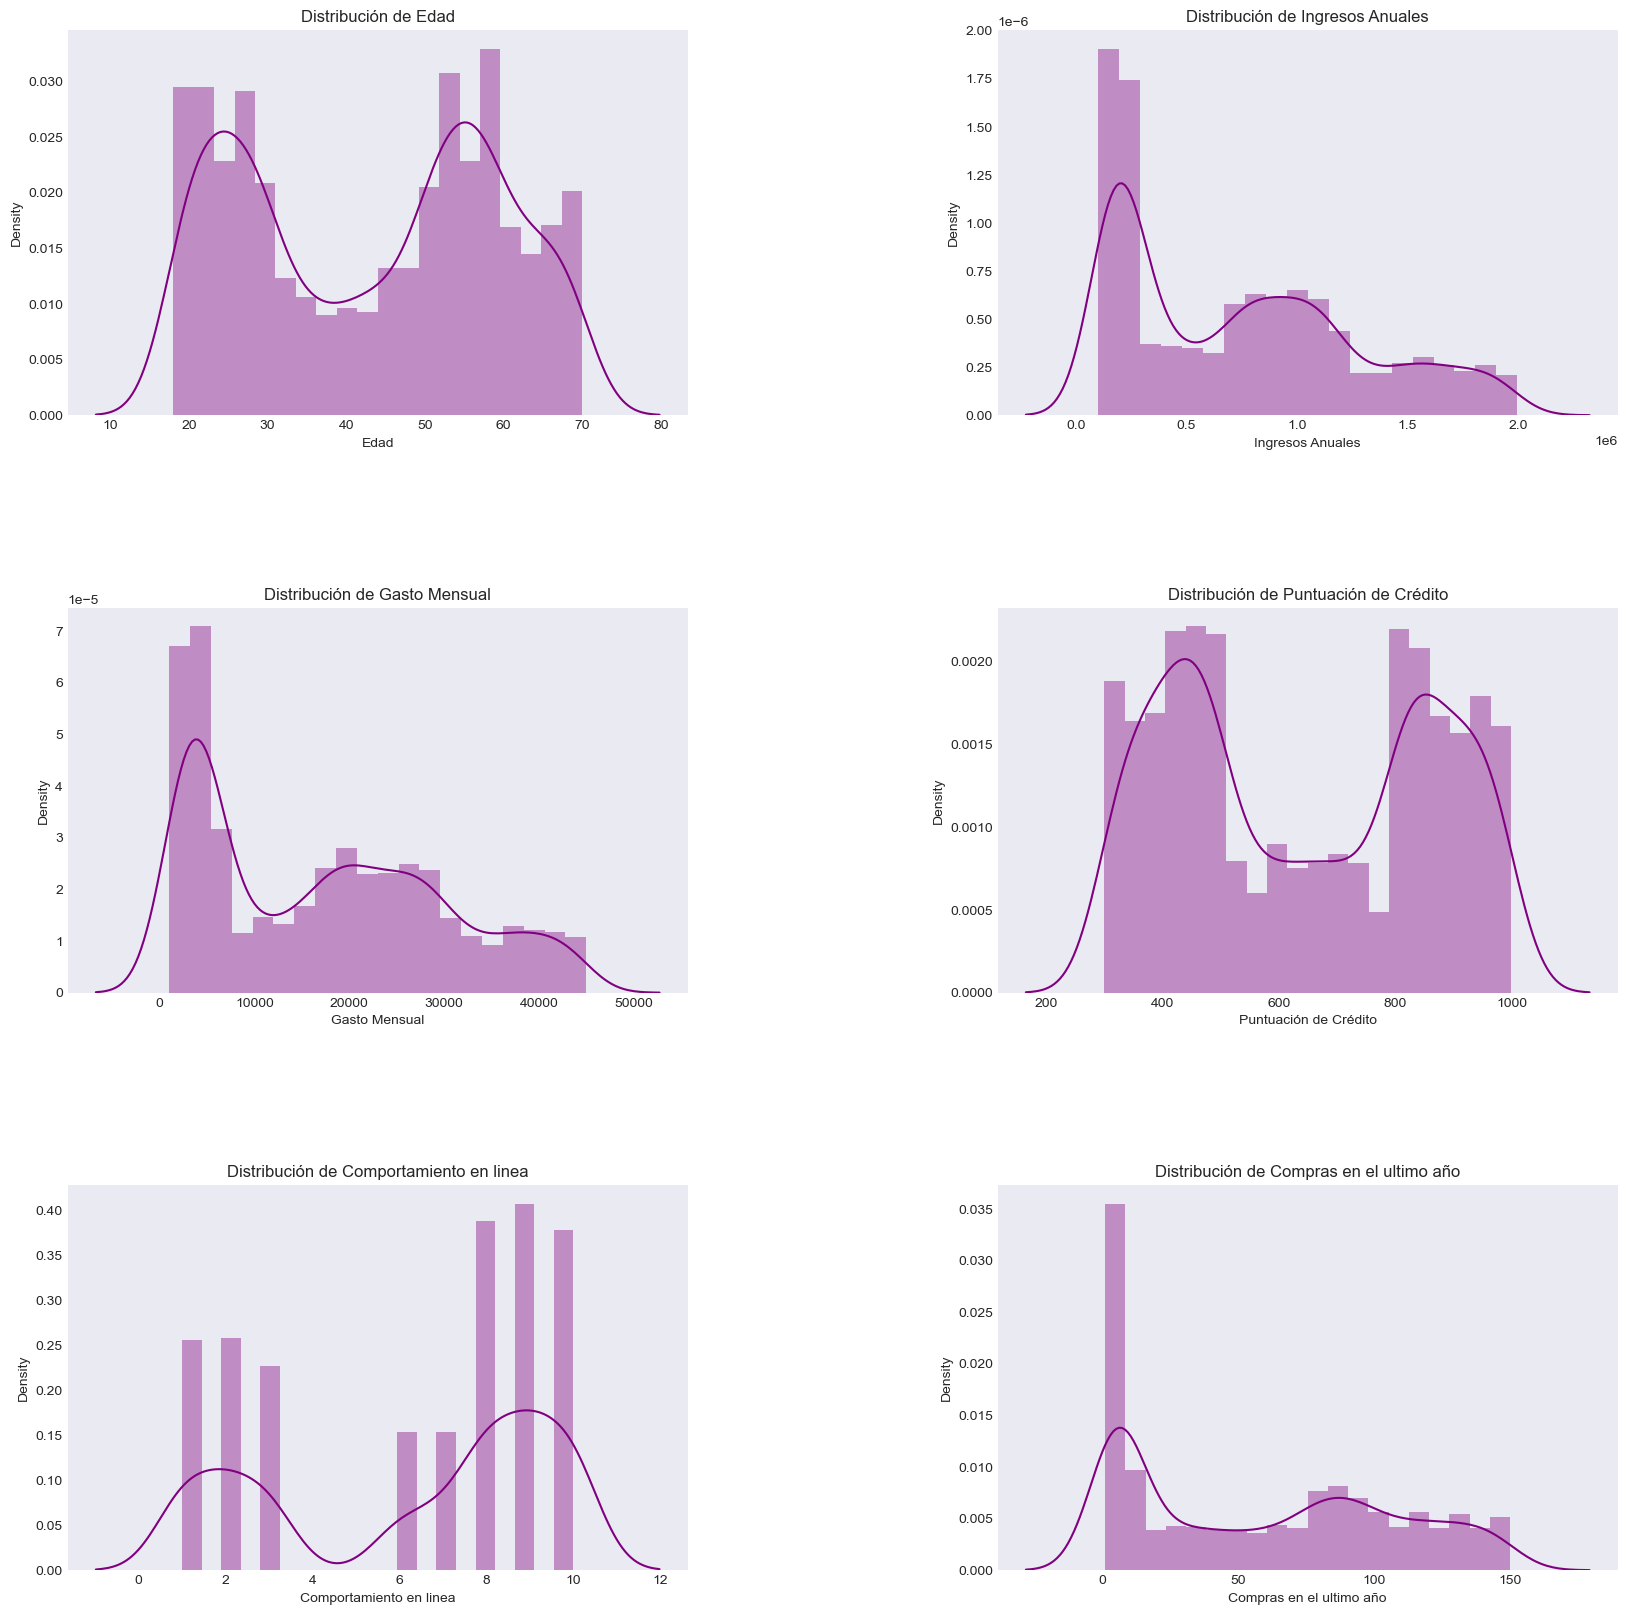

In [3]:
#Analisis de las variables
#Distribucion de las variables cuantitativas
# Distribución de las variables
# =========================================================================
plt.style.use('seaborn-v0_8-dark')
plt.figure(1 , figsize = (20, 20))
n = 0 
for x in ['Edad','Ingresos Anuales','Gasto Mensual','Puntuación de Crédito','Comportamiento en linea','Compras en el ultimo año']:
    n += 1
    plt.subplot(3 , 2 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(data[x], bins=20,color='purple')
    plt.title('Distribución de {}'.format(x))

In [4]:
#Analisis de correlacion lineal
data2 = data.copy()
data2.drop("Genero", axis='columns', inplace=True)
data2.drop("Región", axis='columns', inplace=True)
data2.corr(method='pearson')

,Edad,Ingresos Anuales,Gasto Mensual,Puntuación de Crédito,Comportamiento en linea,Compras en el ultimo año
Edad,1.000000,0.438571,0.467588,0.826753,-0.623042,-0.311414
Ingresos Anuales,0.438571,1.000000,0.734275,0.346943,0.134922,0.436229
Gasto Mensual,0.467588,0.734275,1.000000,0.374231,0.090453,0.401099
Puntuación de Crédito,0.826753,0.346943,0.374231,1.000000,-0.723811,-0.438512
Comportamiento en linea,-0.623042,0.134922,0.090453,-0.723811,1.000000,0.793337
Compras en el ultimo año,-0.311414,0.436229,0.401099,-0.438512,0.793337,1.000000


In [5]:
#segmentacion por Región Sur
data_sur = data[data.Región == 'Sur']
data_sur.drop("Genero", axis='columns', inplace=True)
data_sur.drop("Región", axis='columns', inplace=True)

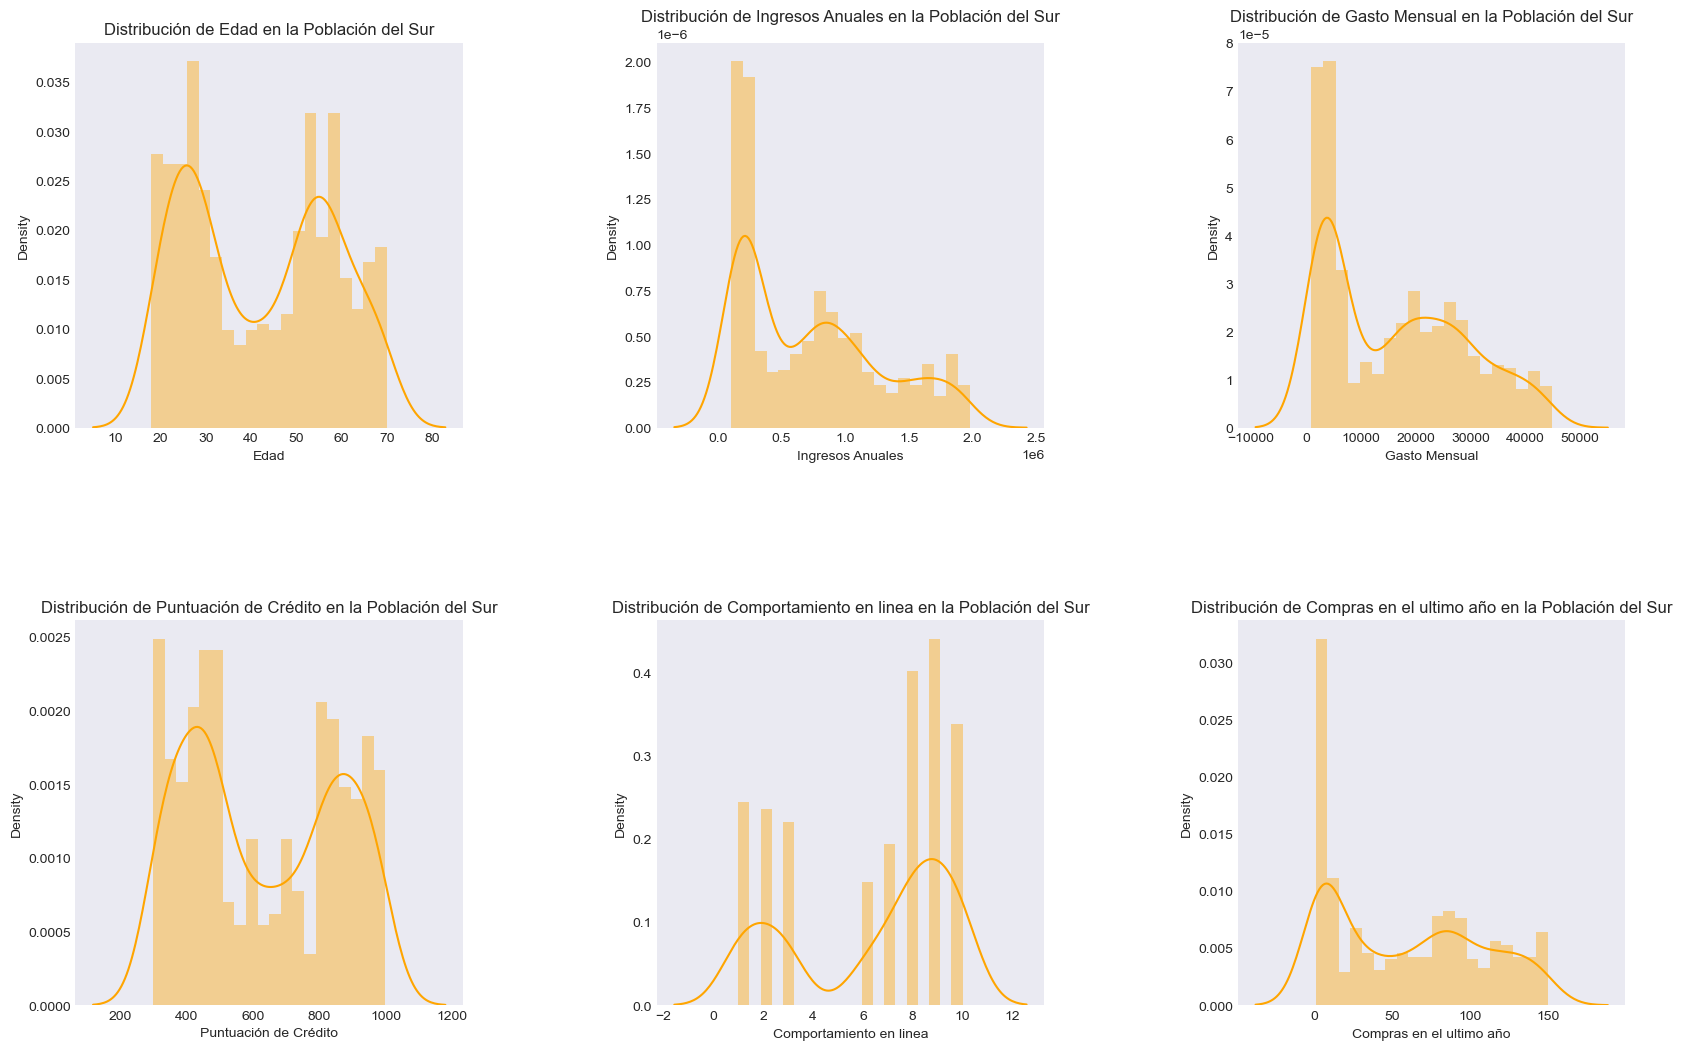

In [6]:
#distribucion por Región Sur
plt.style.use('seaborn-v0_8-dark')
plt.figure(1 , figsize = (20, 20))
n = 0 
for x in data_sur:
    n += 1
    plt.subplot(3 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(data_sur[x], bins=20,color='orange')
    plt.title('Distribución de {} en la Población del Sur'.format(x))

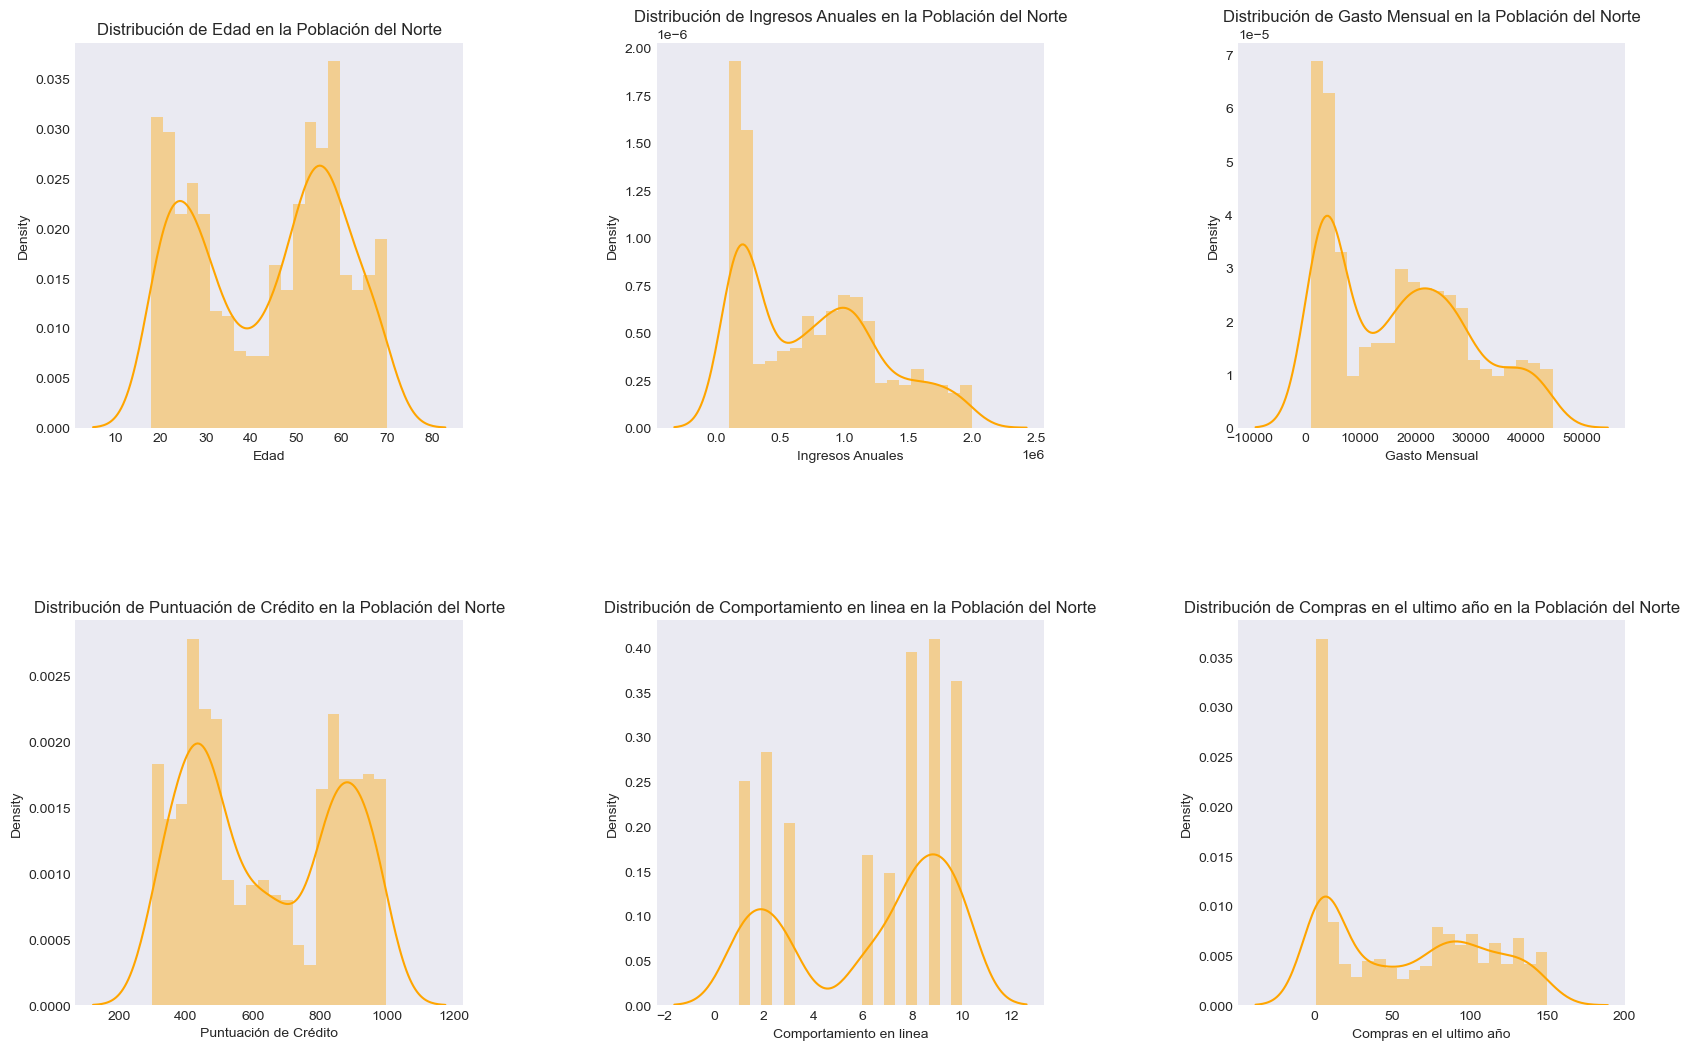

In [7]:
#segmentacion por Región Norte
data_norte = data[data.Región == 'Norte']
data_norte.drop("Genero", axis='columns', inplace=True)
data_norte.drop("Región", axis='columns', inplace=True)
#distribucion por Región Norte
plt.style.use('seaborn-v0_8-dark')
plt.figure(1 , figsize = (20, 20))
n = 0 
for x in data_norte:
    n += 1
    plt.subplot(3 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(data_norte[x], bins=20,color='orange')
    plt.title('Distribución de {} en la Población del Norte'.format(x))

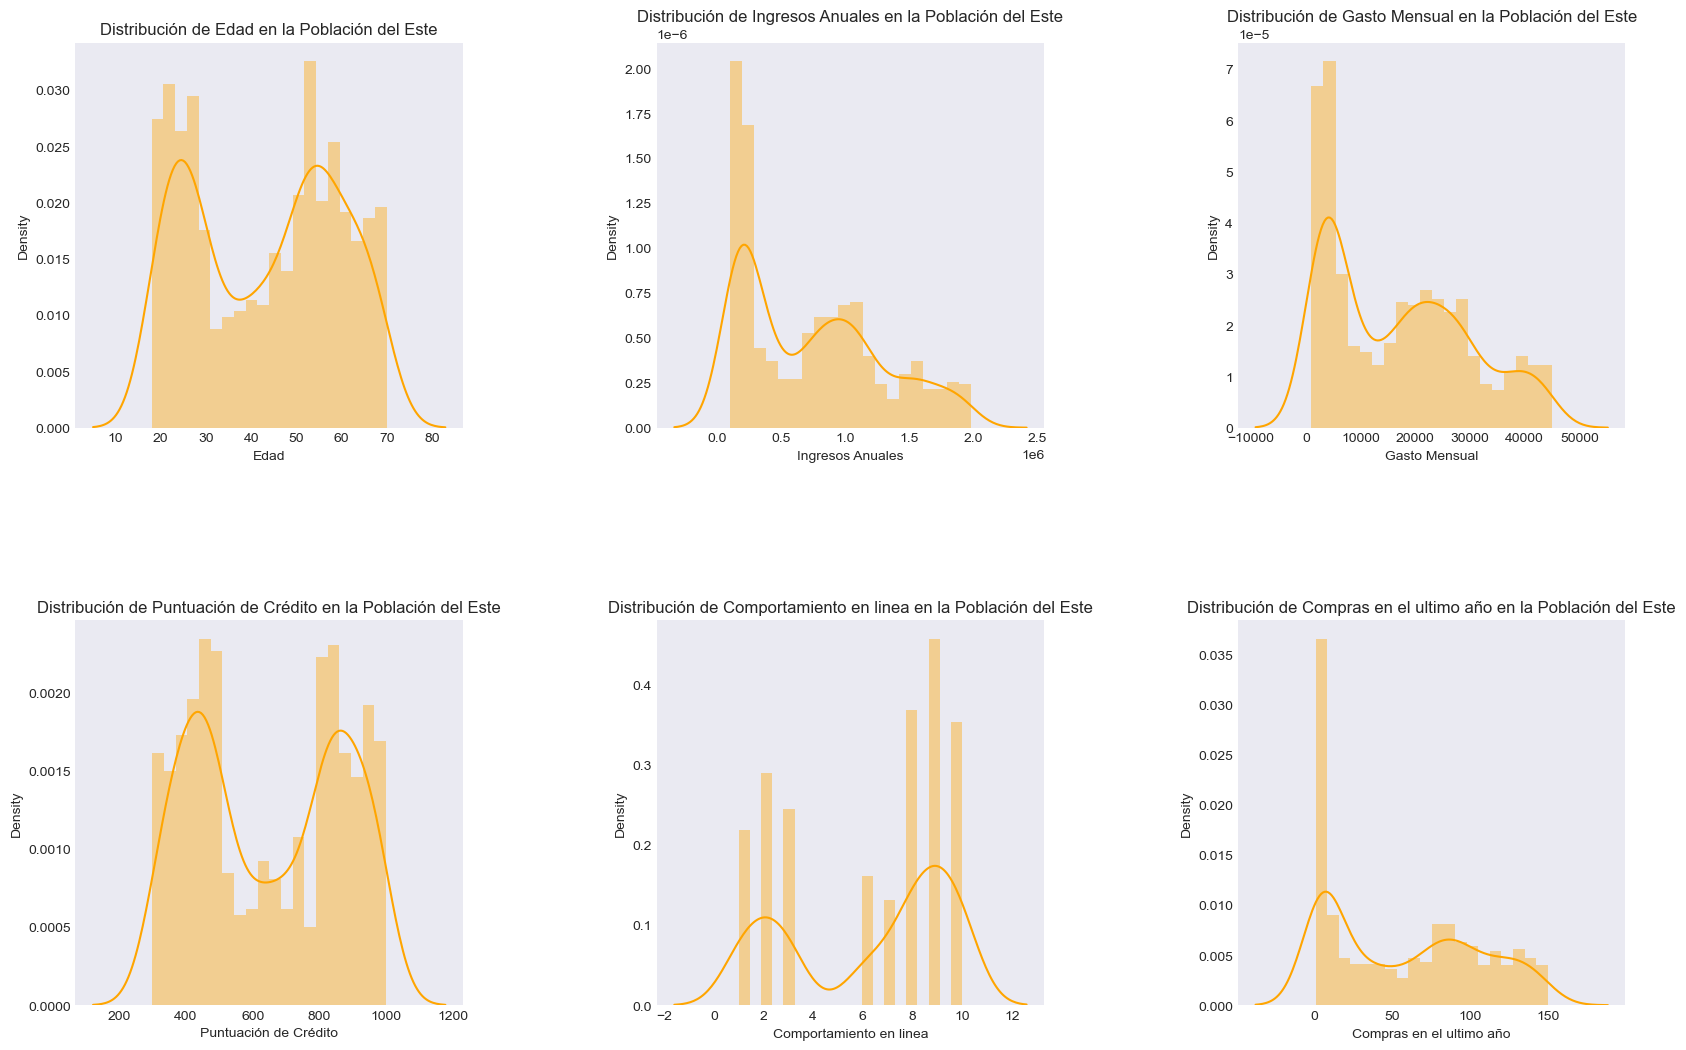

In [8]:
#segmentacion por Región Este
data_este = data[data.Región == 'Este']
data_este.drop("Genero", axis='columns', inplace=True)
data_este.drop("Región", axis='columns', inplace=True)
#distribucion por Región Norte
plt.style.use('seaborn-v0_8-dark')
plt.figure(1 , figsize = (20, 20))
n = 0 
for x in data_este:
    n += 1
    plt.subplot(3 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(data_este[x], bins=20,color='orange')
    plt.title('Distribución de {} en la Población del Este'.format(x))

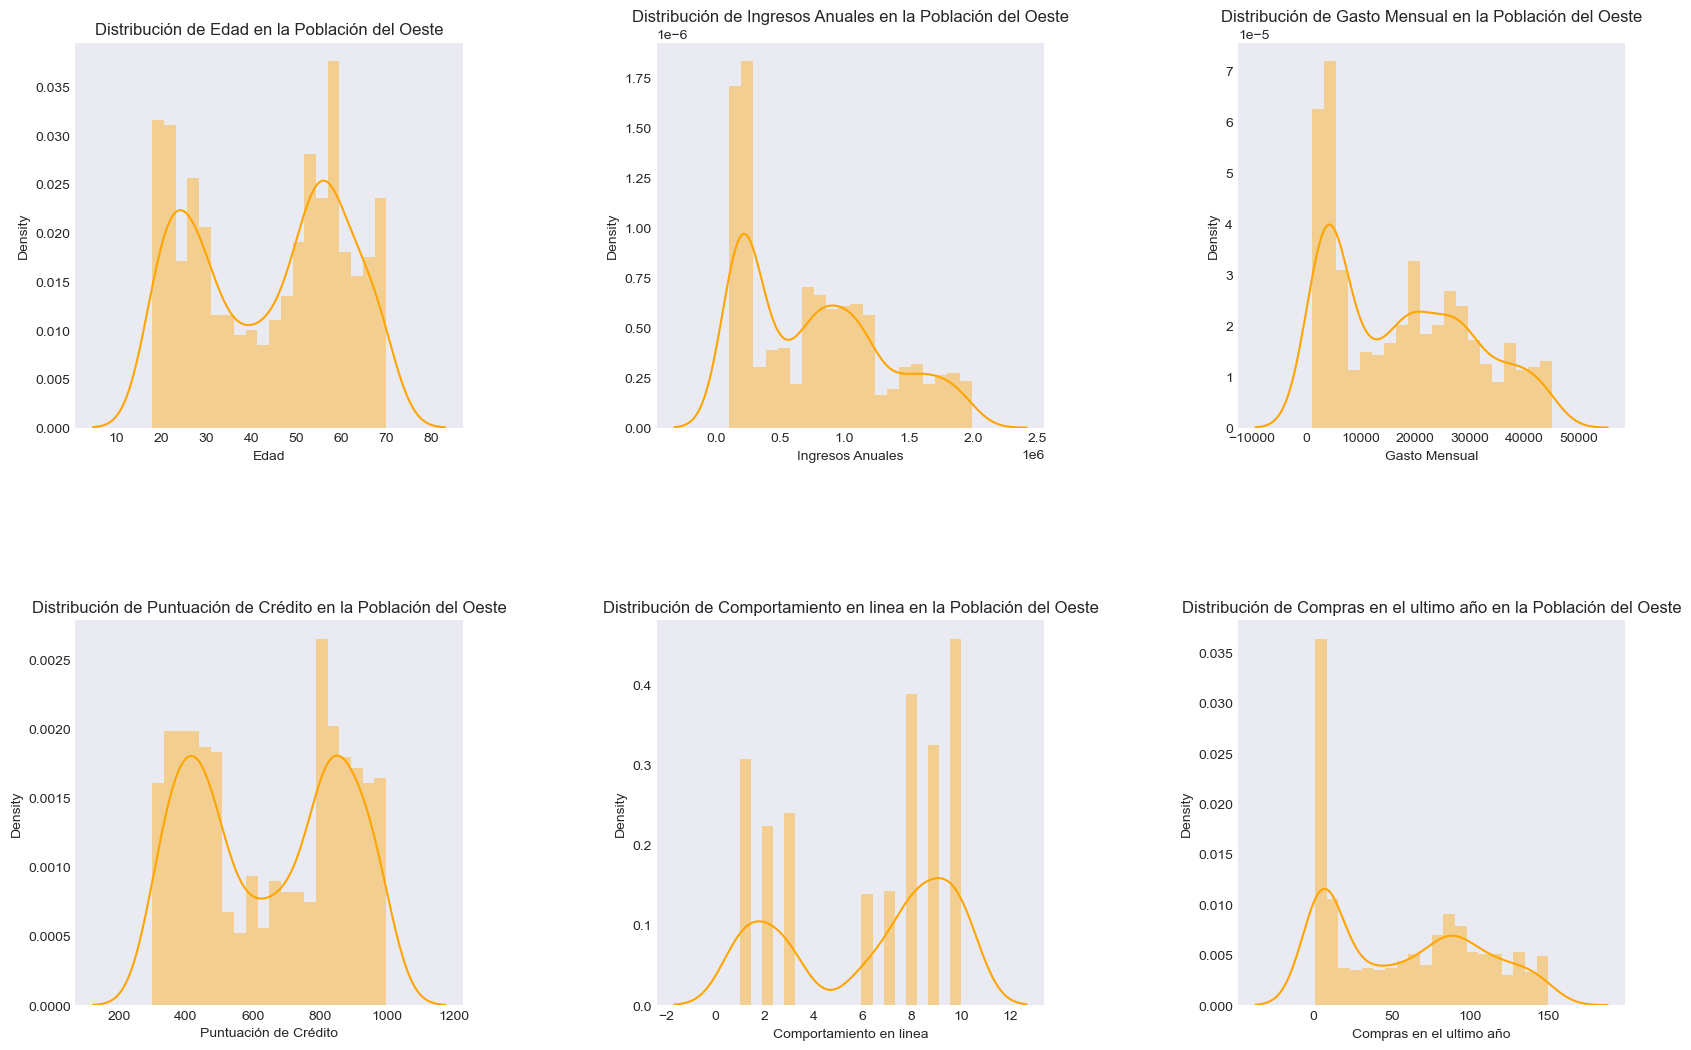

In [9]:
#segmentacion por Región Este
data_oeste = data[data.Región == 'Oeste']
data_oeste.drop("Genero", axis='columns', inplace=True)
data_oeste.drop("Región", axis='columns', inplace=True)
#distribucion por Región Norte
plt.style.use('seaborn-v0_8-dark')
plt.figure(1 , figsize = (20, 20))
n = 0 
for x in data_oeste:
    n += 1
    plt.subplot(3 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(data_oeste[x], bins=20,color='orange')
    plt.title('Distribución de {} en la Población del Oeste'.format(x))

In [33]:
# Normalizacion de las variables
X2 = data.copy()
X2.drop("Genero", axis='columns', inplace=True)
X2.drop("Región", axis='columns', inplace=True)
X3 = preprocessing.normalize(X2)


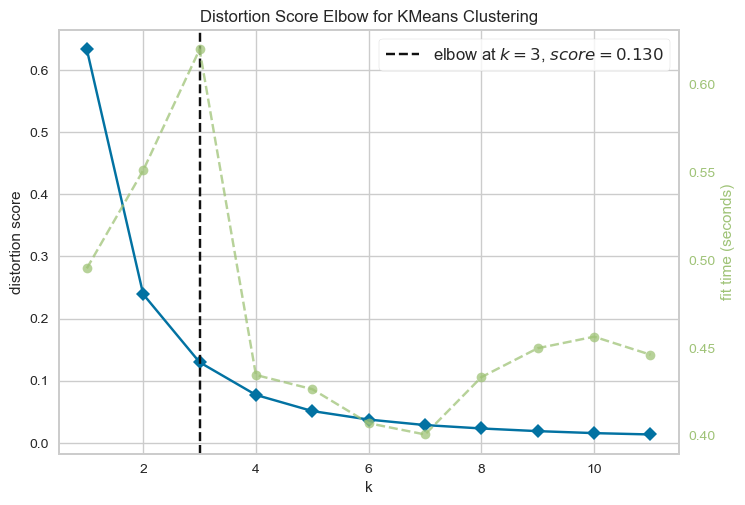

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [34]:
#importe de librerias para clustering
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer

#determinacion del numero de variables
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))
visualizer.fit(X3)       
visualizer.show()        

In [35]:
kmedia_3k = KMeans(n_clusters = 3 ,init='k-means++', n_init = 10 ,max_iter=300, 
                 tol=0.0001,  random_state= 111  , algorithm='elkan')
kmedia_3k.fit(X3)
labels_3k = kmedia_3k.labels_   # Etiqueta de cluters
centroides = kmedia_3k.cluster_centers_   # Centroides de clusters

data['clusters_3k'] =  labels_3k

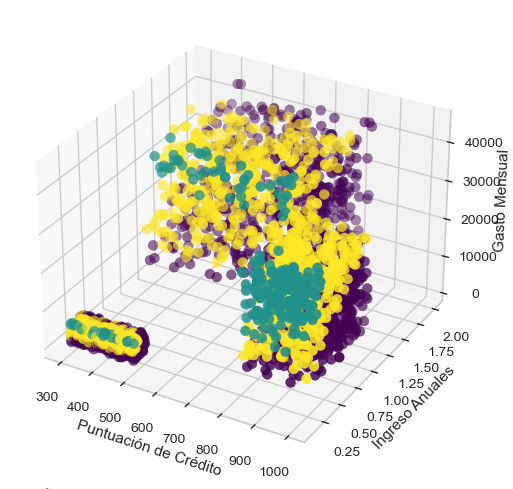

In [38]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection = '3d')

x = data['Puntuación de Crédito']
y = data['Ingresos Anuales']
z = data['Gasto Mensual']

ax.set_xlabel("Puntuación de Crédito")
ax.set_ylabel('Ingreso Anuales')
ax.set_zlabel("Gasto Mensual")

ax.scatter(x, y, z, c=labels_3k, s= 50, cmap='viridis')

plt.show()

In [39]:
data['clusters_3k']
data.to_csv(r'C:\Users\User\Desktop\Prueba_Tecnica_ESRI\clusterized3k_data.csv')
data.head(10)

,Edad,Genero,Ingresos Anuales,Gasto Mensual,Puntuación de Crédito,Región,Comportamiento en linea,Compras en el ultimo año,clusters_2k,clusters_3k
ID,,,,,,,,,,
1,21,Masculino,222011,2297,335,Sur,8,81,1,0
2,26,Masculino,239229,3420,329,Oeste,10,27,1,0
3,38,Masculino,716278,36965,711,Oeste,9,82,0,1
4,64,Femenino,697325,9846,855,Sur,2,6,1,0
5,52,Femenino,1032569,6607,989,Sur,3,2,1,0
6,25,Masculino,219830,2340,483,Norte,9,43,1,0
7,56,Masculino,1068126,12830,930,Sur,1,10,1,0
8,21,Femenino,224981,1410,328,Este,9,24,1,0
9,54,Femenino,1507977,23614,514,Oeste,9,99,1,0


In [43]:
data_3 = data.copy()
data_3.drop("Genero", axis='columns', inplace=True)
data_3.drop("Región", axis='columns', inplace=True)

data_3.drop(data_3[(data_3['Puntuación de Crédito'] <500) & (data_3['Ingresos Anuales'] < 0.75)& (data_3['Gasto Mensual'] < 1000)  ].index, inplace=True)

data_3 = preprocessing.normalize(data_3)


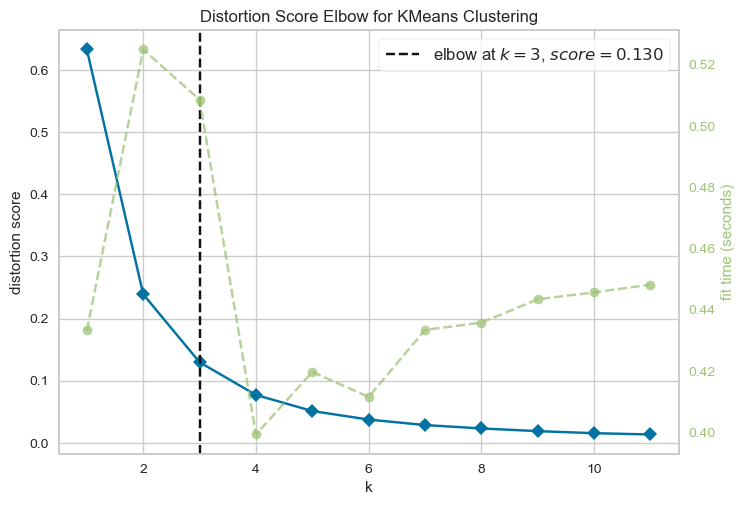

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [44]:
#determinacion del numero de variables
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))
visualizer.fit(data_3)       
visualizer.show()   

In [49]:
kmedia_3k = KMeans(n_clusters = 3 ,init='k-means++', n_init = 10 ,max_iter=300, 
                 tol=0.0001,  random_state= 111  , algorithm='elkan')
kmedia_3k.fit(data_3)
labels_3k = kmedia_3k.labels_   # Etiqueta de cluters
centroides = kmedia_3k.cluster_centers_   # Centroides de clusters

data['clusters_4k'] =  labels_3k

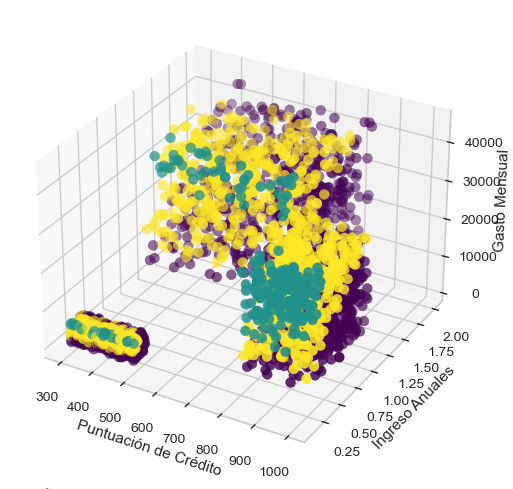

In [50]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection = '3d')

x = data['Puntuación de Crédito']
y = data['Ingresos Anuales']
z = data['Gasto Mensual']

ax.set_xlabel("Puntuación de Crédito")
ax.set_ylabel('Ingreso Anuales')
ax.set_zlabel("Gasto Mensual")

ax.scatter(x, y, z, c=labels_3k, s= 50, cmap='viridis')

plt.show()

In [51]:
data

,Edad,Genero,Ingresos Anuales,Gasto Mensual,Puntuación de Crédito,Región,Comportamiento en linea,Compras en el ultimo año,clusters_2k,clusters_3k,clusters_4k
ID,,,,,,,,,,,
1,21,Masculino,222011,2297,335,Sur,8,81,1,0,0
2,26,Masculino,239229,3420,329,Oeste,10,27,1,0,0
3,38,Masculino,716278,36965,711,Oeste,9,82,0,1,1
4,64,Femenino,697325,9846,855,Sur,2,6,1,0,0
5,52,Femenino,1032569,6607,989,Sur,3,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2996,31,Masculino,1724725,25756,792,Sur,10,83,1,0,0
2997,46,Masculino,1683667,29508,504,Oeste,10,81,1,0,0
2998,26,Masculino,193267,5940,421,Este,7,45,1,2,2


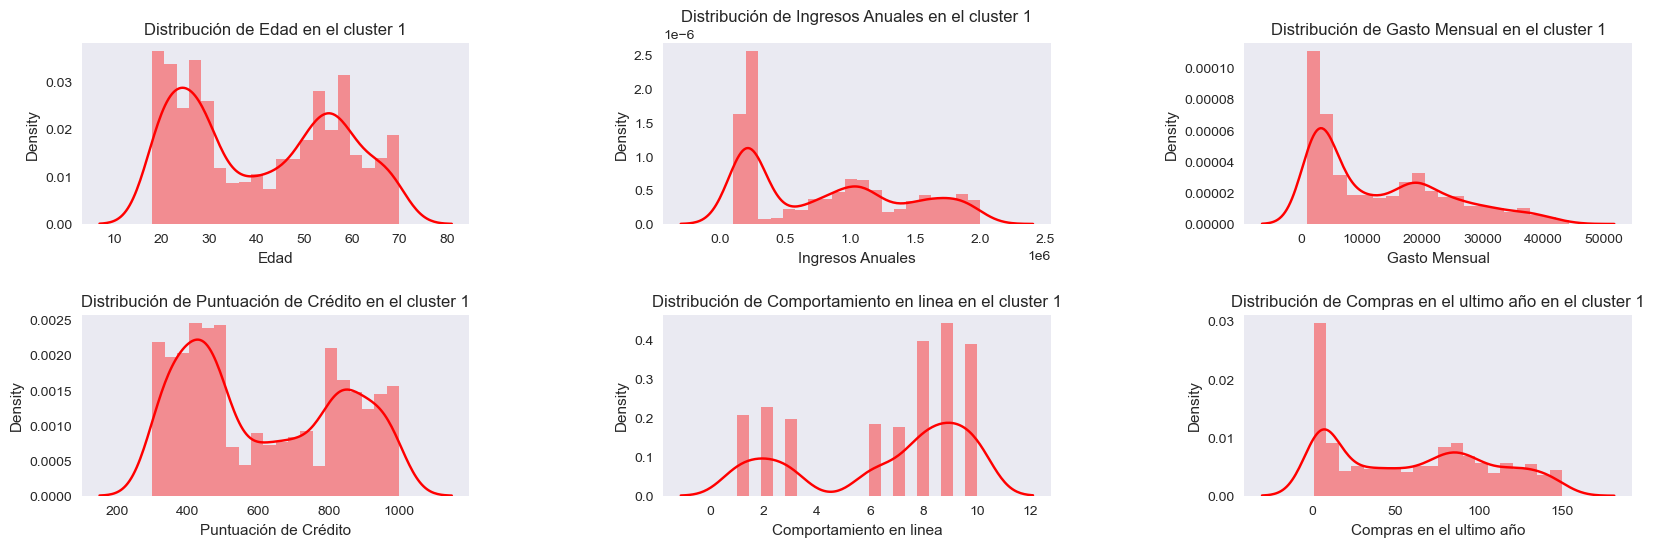

In [64]:
#segmentacion Cluster 1
group_0 = data[data.clusters_3k == 0]
group_0.drop("Genero", axis='columns', inplace=True)
group_0.drop("Región", axis='columns', inplace=True)
group_0.drop("clusters_2k", axis='columns', inplace=True)
group_0.drop("clusters_3k", axis='columns', inplace=True)
group_0.drop("clusters_4k", axis='columns', inplace=True)
#distribucion Cluster 1
plt.style.use('seaborn-v0_8-dark')
plt.figure(1 , figsize = (20, 20))
n = 0 
for x in group_0:
    n += 1
    plt.subplot(6 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(group_0[x], bins=20,color='red')
    plt.title('Distribución de {} en el cluster 1'.format(x))

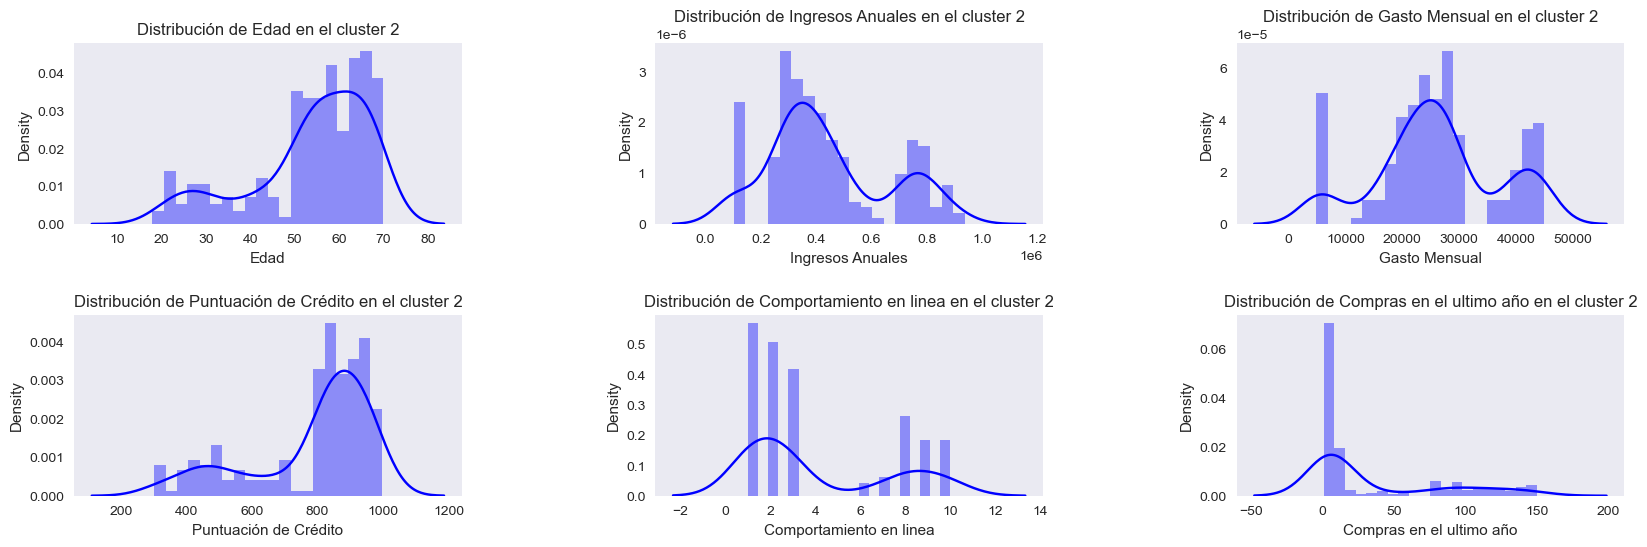

In [67]:
#segmentacion Cluster 2
group_1 = data[data.clusters_3k == 1]
group_1.drop("Genero", axis='columns', inplace=True)
group_1.drop("Región", axis='columns', inplace=True)
group_1.drop("clusters_2k", axis='columns', inplace=True)
group_1.drop("clusters_3k", axis='columns', inplace=True)
group_1.drop("clusters_4k", axis='columns', inplace=True)
#distribucion Cluster 1
plt.style.use('seaborn-v0_8-dark')
plt.figure(1 , figsize = (20, 20))
n = 0 
for x in group_1:
    n += 1
    plt.subplot(6 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(group_1[x], bins=20,color='blue')
    plt.title('Distribución de {} en el cluster 2'.format(x))

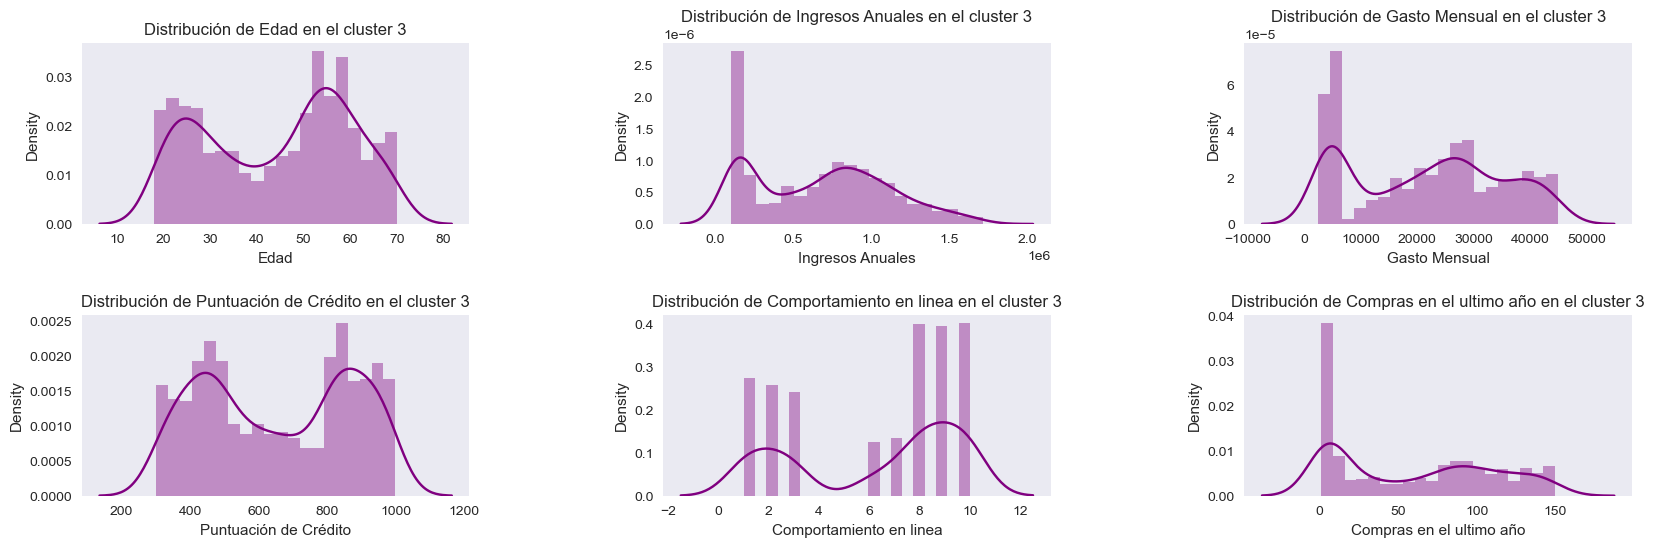

In [68]:
#segmentacion Cluster 3
group_2 = data[data.clusters_3k == 2]
group_2.drop("Genero", axis='columns', inplace=True)
group_2.drop("Región", axis='columns', inplace=True)
group_2.drop("clusters_2k", axis='columns', inplace=True)
group_2.drop("clusters_3k", axis='columns', inplace=True)
group_2.drop("clusters_4k", axis='columns', inplace=True)
#distribucion Cluster 1
plt.style.use('seaborn-v0_8-dark')
plt.figure(1 , figsize = (20, 20))
n = 0 
for x in group_2:
    n += 1
    plt.subplot(6 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(group_2[x], bins=20,color='purple')
    plt.title('Distribución de {} en el cluster 3'.format(x))